# Lesson 3: Clustering 

Clustering is a machine learning task in which data is categorized into groups where items in each group are similar. 

In below figures, we can see the clusters of handwritten digits. Figure 1 (a) shows the single cluster of handwritten digit 8 and Figure 1 (b) shows the clusters of handwritten digits 0 - 9. 

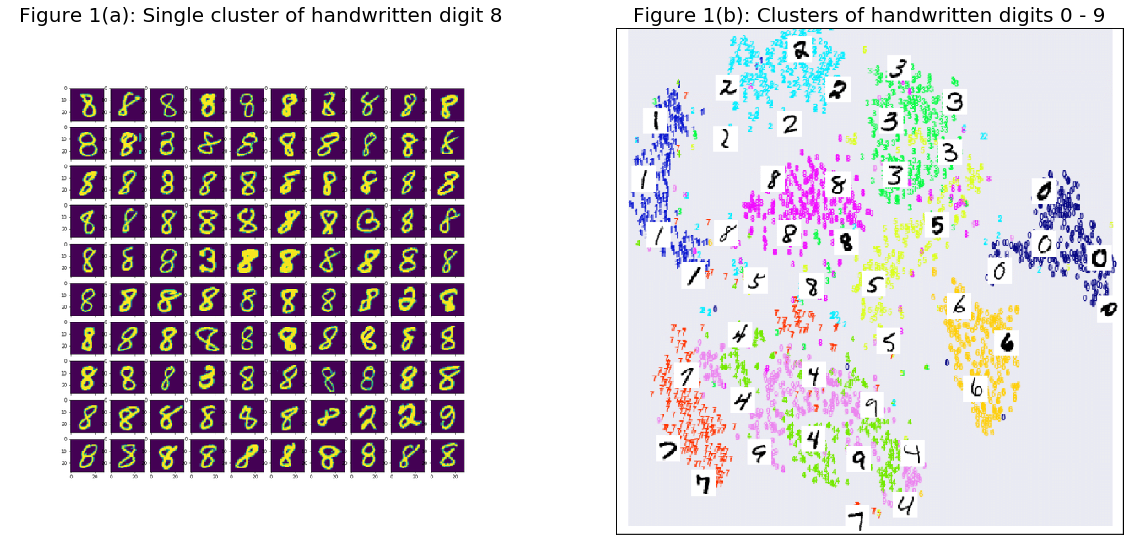

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from PIL import Image

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 20,20

# read images
img_A = Image.open('../assets/mnist_8.png')
img_B = Image.open('../assets/mnist_all.png') 
img_B = img_B.resize(img_A.size)
# display images
fig, ax = plt.subplots(1,2)


ax[0].imshow(img_A);
ax[0].axis('off')
ax[0].set_title("Figure 1(a): Single cluster of handwritten digit 8", fontsize = 20)
ax[1].imshow(img_B);
ax[1].axis('off')
a = ax[1].set_title("Figure 1(b): Clusters of handwritten digits 0 - 9", fontsize = 20)


# Activity 1

In Figure 1 (a), Why are there images corresponding to digit '3' are part of cluster '8'?


# Activity 2

In Figure 1 (b), Why distance between clusters of 4 and 7 is less than disance between cluster of 7 and 0?


# Clustering for World Happiness Dataset

In [51]:
# Load World Happiness Data
import pandas as pd
df = pd.read_csv("../assets/happinessDataset/2015.csv")

# View first five rows of the dataset
df.head()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Data Normalization For Clustering

In [55]:
# Normalize the dataset values between 0 and 1

# import module which normalize the data between 0 and 1 by subtracting mean, 
# and dividing by standard deviation
from sklearn.preprocessing import StandardScaler

# Print columns and their data types

df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [63]:
# See the range of values of different columns

df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# Activity 3
Which columns in world happiness data have numerical values?



In [72]:

# Select relevant columns and normalize them using standard scaler
data = df[["Happiness Score", 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]
ss = StandardScaler()

# Fit standard scaler to the data
clustering_data = ss.fit_transform(data)

# View normalized dataset 
clustering_data = pd.DataFrame(clustering_data, columns= data.columns)
clustering_data.head(5)



,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.937360,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.914581,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857
2,1.884792,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.880411,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.797179,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337


In [73]:
# Remove normalization by uncommenting below code 
# clustering_data = data

In [74]:
# K-Means Clustering on World Happiness Data 
from sklearn.cluster import KMeans

def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

# Cluster the data into two groups
clust_labels, cent = doKmeans(clustering_data, 2)
kmeans = pd.DataFrame(clust_labels)
clustering_data.insert((clustering_data.shape[1]),'kmeans',kmeans)

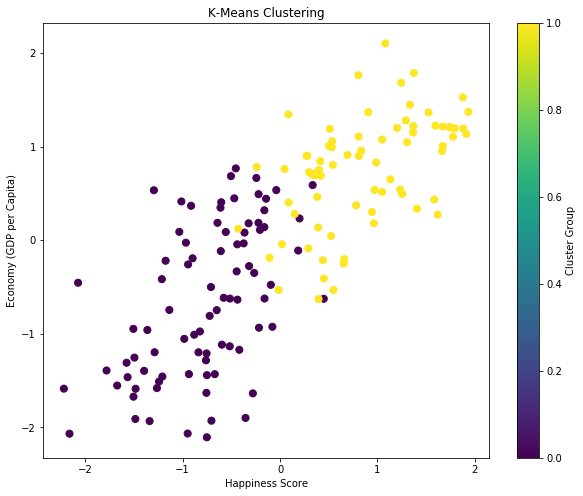

In [75]:
# Plot the clusters obtained using k means using scatter plot 
# between happiness score and economy GDP
fig = plt.figure(figsize= (10,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(clustering_data['Happiness Score'],clustering_data['Economy (GDP per Capita)'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Happiness Score')
ax.set_ylabel('Economy (GDP per Capita)')
cbar = plt.colorbar(scatter)
cbar.set_label("Cluster Group")

# Activity 4
Question: Which cluster represents high happiness score?  1 or 2 

Question: Which cluster represents high economy? 1 or 2



In [76]:
# Visualize clusters on geographical map

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
wh1 = clustering_data
if 'Country' not in wh1.columns:
    wh1.insert(0,'Country', df.iloc[:,0])
data = [dict(type='choropleth',
             locations = wh1['Country'],
             locationmode = 'country names',
             z = wh1['kmeans'],
             text = wh1['Country'],
             colorbar = {'title':'Cluster Group'})]
layout = dict(title='Clustering of Countries based on K-Means',
              geo=dict(showframe = False,
                       projection = {'type':'mercator'}))
map1 = go.Figure(data = data, layout=layout)
iplot(map1)

# Activity 5: Change number of clusters
Change number of clusters to three and generate clustering graphs again. 


# Activity 6: Data Normalization and Clustering 
Comment the cell which does data normalization and see the effect of removing data normalization on clustering results